<a href="https://colab.research.google.com/github/TriptSharma/mlpiv/blob/master/TrainerMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install scikit-learn

KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [0]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [0]:
print(df)

      Unnamed: 0       0     1     2             3         4         5
0              0   0.005  0.09  0.09 -1.470000e-09 -0.000005  0.000005
1              1   0.010  0.09  0.09  1.230000e-09 -0.000011  0.000011
2              2   0.015  0.09  0.09  8.630000e-10 -0.000016  0.000016
3              3   0.020  0.09  0.09  1.070000e-09 -0.000021  0.000021
4              4   0.025  0.09  0.09  1.310000e-09 -0.000027  0.000027
5              5   0.030  0.09  0.09  7.240000e-10 -0.000032  0.000032
6              6   0.035  0.09  0.09  8.620000e-10 -0.000037  0.000037
7              7   0.040  0.09  0.09  1.020000e-09 -0.000042  0.000042
8              8   0.045  0.09  0.09  1.180000e-09 -0.000047  0.000047
9              9   0.050  0.09  0.09  1.350000e-09 -0.000052  0.000052
10            10   0.055  0.09  0.09  1.530000e-09 -0.000056  0.000056
11            11   0.060  0.09  0.09  1.710000e-09 -0.000061  0.000061
12            12   0.065  0.09  0.09  8.740000e-10 -0.000066  0.000066
13    

In [0]:
df = pd.read_csv(r'data.csv')

X = df.drop('3', axis=1)
y = df['3']
print(X.head(), y.head())

   Unnamed: 0      0     1     2         4         5
0           0  0.005  0.09  0.09 -0.000005  0.000005
1           1  0.010  0.09  0.09 -0.000011  0.000011
2           2  0.015  0.09  0.09 -0.000016  0.000016
3           3  0.020  0.09  0.09 -0.000021  0.000021
4           4  0.025  0.09  0.09 -0.000027  0.000027 0   -1.470000e-09
1    1.230000e-09
2    8.630000e-10
3    1.070000e-09
4    1.310000e-09
Name: 3, dtype: float64


In [0]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [0]:
X_train, X_test = X_scaled[:1600], X_scaled[1600:]
y_train, y_test = y_scaled[:1600], y_scaled[1600:]

In [0]:
print(X_scaled)
print(y_scaled)

[[-1.731185   -1.731185    0.          0.         -1.12349871  1.12740874]
 [-1.72945295 -1.72945295  0.          0.         -1.12880319  1.13028994]
 [-1.7277209  -1.7277209   0.          0.         -1.13404674  1.13313927]
 ...
 [ 1.7277209   1.7277209   0.          0.          1.0180526  -1.30952919]
 [ 1.72945295  1.72945295  0.          0.          1.01818098 -1.30981904]
 [ 1.731185    1.731185    0.          0.          1.01830935 -1.31011426]]
[-1.46857234 -1.31588783 -1.33664162 ...  0.73517407  0.75213902
  0.77475895]


In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
y_predicted= mlp.predict(X_test)
print("Mean squared error %f" % mean_squared_error(y_test,y_predicted))
print("Variance score %f" % r2_score(y_test,y_predicted))
print("Mean absolute error %f" % mean_absolute_error(y_test,y_predicted))

Training set score: 0.889180
Test set score: -1.210550
Mean squared error 2.580799
Variance score -1.210550
Mean absolute error 1.319493


In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=5, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08,n_iter_no_change=10)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
y_predicted= mlp.predict(X_test)
print("Mean squared error %f" % mean_squared_error(y_test,y_predicted))
print("Variance score %f" % r2_score(y_test,y_predicted))
print("Mean absolute error %f" % mean_absolute_error(y_test,y_predicted))
print(y_predicted)
print(y_test)


Training set score: 0.898962
Test set score: -0.727117
Mean squared error 2.016395
Variance score -0.727117
Mean absolute error 1.221839
[0.50398842 0.50367227 0.50323511 0.50279795 0.50236079 0.50189963
 0.50146246 0.50088029 0.50029812 0.49983696 0.49925479 0.49896264
 0.49838047 0.49777429 0.49716812 0.49656195 0.49595578 0.4953256
 0.49469543 0.49406526 0.49343509 0.49278091 0.49222375 0.49156957
 0.4909884  0.49043124 0.48982607 0.4892449  0.48873674 0.48813157
 0.48772042 0.48718826 0.48675311 0.48631795 0.4858588  0.48549665
 0.48511051 0.48484537 0.48455623 0.4843641  0.48414797 0.48398426
 0.4838075  0.48370363 0.48357565 0.48354467 0.48348959 0.4835315
 0.48367042 0.48378522 0.48399703 0.48416063 0.48442122 0.48480292
 0.48525751 0.4856639  0.48619138 0.48667066 0.48736804 0.48804131
 0.48869048 0.48921912 0.49032859 0.49093013 0.49179798 0.49285982
 0.49389756 0.4950323  0.49625113 0.4975708  0.49884211 0.50050131
 0.5020638  0.50345671 0.50480128 0.50648537 0.50814529 0.510

Iteration 1, loss = 0.36209428
Iteration 2, loss = 0.33144192
Iteration 3, loss = 0.32260318
Iteration 4, loss = 0.32274582
Iteration 5, loss = 0.31177503
Iteration 6, loss = 0.30838490
Iteration 7, loss = 0.30519217
Iteration 8, loss = 0.31073464
Iteration 9, loss = 0.30954285
Iteration 10, loss = 0.30136671
Iteration 11, loss = 0.29862087
Iteration 12, loss = 0.29341929
Iteration 13, loss = 0.29254029
Iteration 14, loss = 0.28346808
Iteration 15, loss = 0.28182133
Iteration 16, loss = 0.28580707
Iteration 17, loss = 0.27775341
Iteration 18, loss = 0.27007386
Iteration 19, loss = 0.26260211
Iteration 20, loss = 0.25802480
Iteration 21, loss = 0.26679958
Iteration 22, loss = 0.28432257
Iteration 23, loss = 0.26555328
Iteration 24, loss = 0.25324839
Iteration 25, loss = 0.25177425
Iteration 26, loss = 0.26343488
Iteration 27, loss = 0.24538199
Iteration 28, loss = 0.23208688
Iteration 29, loss = 0.22683810
Iteration 30, loss = 0.22886803
Iteration 31, loss = 0.21907180
Iteration 32, los

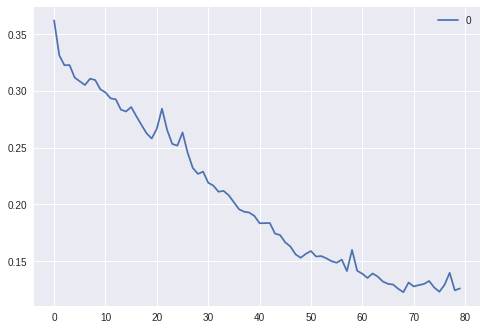

In [0]:

+mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='adam', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=5, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
y_predicted= mlp.predict(X_test)
print("Mean squared error %f" % mean_squared_error(y_test,y_predicted))
print("Variance score %f" % r2_score(y_test,y_predicted))
print("Mean absolute error %f" % mean_absolute_error(y_test,y_predicted))
pd.DataFrame(mlp.loss_curve_).plot()

In [0]:
opts = ['adam','sgd']
for i in opts:
  mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver=i, 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=5, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
  


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
y_predicted= mlp.predict(X_test)
print("Mean squared error %f" % mean_squared_error(y_test,y_predicted))
print("Variance score %f" % r2_score(y_test,y_predicted))
print("Mean absolute error %f" % mean_absolute_error(y_test,y_predicted))


Iteration 1, loss = 0.36808423
Iteration 2, loss = 0.33757173
Iteration 3, loss = 0.33072778
Iteration 4, loss = 0.32555517
Iteration 5, loss = 0.32222735
Iteration 6, loss = 0.31973666
Iteration 7, loss = 0.31876505
Iteration 8, loss = 0.31701523
Iteration 9, loss = 0.31538058
Iteration 10, loss = 0.31692836
Iteration 11, loss = 0.31334388
Iteration 12, loss = 0.31365099
Iteration 13, loss = 0.31283829
Iteration 14, loss = 0.31193084
Iteration 15, loss = 0.31282681
Iteration 16, loss = 0.31069608
Iteration 17, loss = 0.31043788
Iteration 18, loss = 0.31155121
Iteration 19, loss = 0.30924990
Iteration 20, loss = 0.30930683
Iteration 21, loss = 0.31257241
Iteration 22, loss = 0.30920690
Iteration 23, loss = 0.30801356
Iteration 24, loss = 0.30812312
Iteration 25, loss = 0.31020225
Iteration 26, loss = 0.30901348
Iteration 27, loss = 0.30696233
Iteration 28, loss = 0.30613749
Iteration 29, loss = 0.30521245
Iteration 30, loss = 0.30732364
Iteration 31, loss = 0.30548600
Iteration 32, los

In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.894943
Test set score: 0.879055


In [0]:
model= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='adam', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 0.41443947
Iteration 2, loss = 0.38136363
Iteration 3, loss = 0.36144322
Iteration 4, loss = 0.36341959
Iteration 5, loss = 0.36290796
Iteration 6, loss = 0.35709987
Iteration 7, loss = 0.34967758
Iteration 8, loss = 0.34618839
Iteration 9, loss = 0.34188624
Iteration 10, loss = 0.33254513
Iteration 11, loss = 0.33528213
Iteration 12, loss = 0.32982294
Iteration 13, loss = 0.32284667
Iteration 14, loss = 0.32096061
Iteration 15, loss = 0.31939042
Iteration 16, loss = 0.31522251
Iteration 17, loss = 0.31556593
Iteration 18, loss = 0.31776981
Iteration 19, loss = 0.31641474
Iteration 20, loss = 0.30783263
Iteration 21, loss = 0.30292969
Iteration 22, loss = 0.30011261
Iteration 23, loss = 0.30654710
Iteration 24, loss = 0.29095640
Iteration 25, loss = 0.29066261
Iteration 26, loss = 0.28721580
Iteration 27, loss = 0.28210434
Iteration 28, loss = 0.27805439
Iteration 29, loss = 0.26882481
Iteration 30, loss = 0.26703972
Iteration 31, loss = 0.26322170
Iteration 32, los

In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.002, 
                  batch_size=128, 
                  learning_rate='adaptive', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.886606
Test set score: 0.880719


In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.002, 
                  batch_size=128, 
                  learning_rate='adaptive', 
                  learning_rate_init=0.01,
                  max_iter=1500, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.883342
Test set score: 0.844656


In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.0034, 
                  batch_size=128, 
                  learning_rate='adaptive', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.891822
Test set score: 0.880960


In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.002, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.887747
Test set score: 0.843761


Iteration 1, loss = 0.43699419
Iteration 2, loss = 0.37387916
Iteration 3, loss = 0.36254365
Iteration 4, loss = 0.36142931
Iteration 5, loss = 0.35953018
Iteration 6, loss = 0.34887587
Iteration 7, loss = 0.34318587
Iteration 8, loss = 0.34449825
Iteration 9, loss = 0.33496432
Iteration 10, loss = 0.33437573
Iteration 11, loss = 0.32935752
Iteration 12, loss = 0.32785045
Iteration 13, loss = 0.32763110
Iteration 14, loss = 0.32390422
Iteration 15, loss = 0.32752154
Iteration 16, loss = 0.32213494
Iteration 17, loss = 0.32972155
Iteration 18, loss = 0.33476986
Iteration 19, loss = 0.31915784
Iteration 20, loss = 0.31510514
Iteration 21, loss = 0.30767194
Iteration 22, loss = 0.30685550
Iteration 23, loss = 0.31083531
Iteration 24, loss = 0.30870782
Iteration 25, loss = 0.30381318
Iteration 26, loss = 0.29693674
Iteration 27, loss = 0.30597159
Iteration 28, loss = 0.30776298
Iteration 29, loss = 0.29177153
Iteration 30, loss = 0.28208367
Iteration 31, loss = 0.28799750
Iteration 32, los

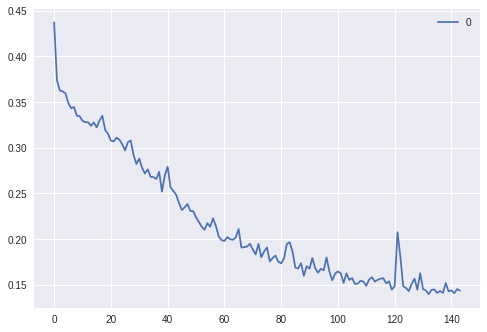

In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='adam', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

pd.DataFrame(mlp.loss_curve_).plot()



In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='adam', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

In [0]:
mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


Iteration 1, loss = 0.41752889
Iteration 2, loss = 0.37615019
Iteration 3, loss = 0.35900622
Iteration 4, loss = 0.35735335
Iteration 5, loss = 0.34865020
Iteration 6, loss = 0.34727512
Iteration 7, loss = 0.34274542
Iteration 8, loss = 0.35043430
Iteration 9, loss = 0.33874546
Iteration 10, loss = 0.33759300
Iteration 11, loss = 0.33102313
Iteration 12, loss = 0.32378827
Iteration 13, loss = 0.32471500
Iteration 14, loss = 0.32336651
Iteration 15, loss = 0.32036030
Iteration 16, loss = 0.31595016
Iteration 17, loss = 0.31345986
Iteration 18, loss = 0.31099318
Iteration 19, loss = 0.30696811
Iteration 20, loss = 0.31601036
Iteration 21, loss = 0.32337516
Iteration 22, loss = 0.30504398
Iteration 23, loss = 0.30118165
Iteration 24, loss = 0.29901465
Iteration 25, loss = 0.29377483
Iteration 26, loss = 0.29577285
Iteration 27, loss = 0.28571216
Iteration 28, loss = 0.28754892
Iteration 29, loss = 0.27567178
Iteration 30, loss = 0.28164392
Iteration 31, loss = 0.27369070
Iteration 32, los

In [0]:
mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='lbfgs', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

In [0]:
mlp.fit(X_scaled, y_scaled)
print("Training set score: %f" % mlp.score(X_scaled, y_scaled))
print("Test set score: %f" % mlp.score(X_testscaled, y_testscaled))


Training set score: 0.884287
Test set score: -42.692384


In [0]:
df = pd.read_csv(r'data.csv')

X = df.drop('3', axis=1)
w = X.drop('1', axis=1)
o = w.drop('2', axis=1)

p = df['3']

o_train, o_test = o[:1600], o[1600:]
p_train, p_test = p[:1600], p[1600:]

from sklearn import preprocessing
o_scaled = preprocessing.scale(o_train)
p_scaled = preprocessing.scale(p_train)
o_testscaled = preprocessing.scale(o_test)
p_testscaled = preprocessing.scale(p_test)

mlp= MLPRegressor(hidden_layer_sizes= (100,), 
                  activation='relu', 
                  solver='adam', 
                  alpha=0.0001, 
                  batch_size=128, 
                  learning_rate='constant', 
                  learning_rate_init=0.01,
                  max_iter=1000, 
                  shuffle=True, 
                  random_state=None, 
                  verbose=True,
                  warm_start=False,
                  early_stopping=False, 
                  beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

mlp.fit(o_scaled, p_scaled)
print("Training set score: %f" % mlp.score(o_scaled, p_scaled))
print("Test set score: %f" % mlp.score(o_testscaled, p_testscaled))

In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train, y_train)
scaler.transform(X_train,y_train)
scaler.transform(X_test, y_test)
print(y_train)



In [0]:
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

Iteration 1, loss = 1515.31589428
Iteration 2, loss = 286.64669246
Iteration 3, loss = 33.28859666
Iteration 4, loss = 19.41223372
Iteration 5, loss = 6.44290105
Iteration 6, loss = 1.17802482
Iteration 7, loss = 0.26738360
Iteration 8, loss = 0.07626135
Iteration 9, loss = 0.01955588
Iteration 10, loss = 0.00578584
Iteration 11, loss = 0.00153681
Iteration 12, loss = 0.00038244
Iteration 13, loss = 0.00009999
Iteration 14, loss = 0.00002623
Iteration 15, loss = 0.00001379
Iteration 16, loss = 0.00001004
Iteration 17, loss = 0.00000850
Iteration 18, loss = 0.00000773
Iteration 19, loss = 0.00000759
Iteration 20, loss = 0.00000749
Iteration 21, loss = 0.00000742
Iteration 22, loss = 0.00000736
Iteration 23, loss = 0.00000731
Iteration 24, loss = 0.00000726
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
-25415922111.427303
-39677990099.65804


In [0]:
mlp.fit(X_train, y_train)
print(accuracy_score(X_train, y_train))
print(accuracy_score(X_test, y_test))

Iteration 1, loss = 9898.90992228
Iteration 2, loss = 515.11148409
Iteration 3, loss = 288.06607688
Iteration 4, loss = 99.50872359
Iteration 5, loss = 10.70825723
Iteration 6, loss = 7.67585449
Iteration 7, loss = 1.27418201
Iteration 8, loss = 0.02147437
Iteration 9, loss = 0.02447628
Iteration 10, loss = 0.00349040
Iteration 11, loss = 0.00215598
Iteration 12, loss = 0.00150783
Iteration 13, loss = 0.00114285
Iteration 14, loss = 0.00109285
Iteration 15, loss = 0.00113859
Iteration 16, loss = 0.00111534
Iteration 17, loss = 0.00315483
Iteration 18, loss = 0.00141595
Iteration 19, loss = 0.00117532
Iteration 20, loss = 0.00109590
Iteration 21, loss = 0.00108423
Iteration 22, loss = 0.00107391
Iteration 23, loss = 0.00105034
Iteration 24, loss = 0.00091574
Iteration 25, loss = 0.00101758
Iteration 26, loss = 0.00096676
Iteration 27, loss = 0.00091311
Iteration 28, loss = 0.00103180
Iteration 29, loss = 0.00103035
Iteration 30, loss = 0.00102503
Iteration 31, loss = 0.00101916
Iteratio

ValueError: ignored

In [0]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))

-0.5212726202151294


In [0]:
from sklearn.svm import SVR
svr= SVR(kernel='rbf', degree=3, gamma='scale', C=1.25, epsilon=0.02, shrinking=True, cache_size=200, verbose=True, max_iter=2000)
svr.fit(X_train, y_train)
print("Training set score: %f" % svr.score(X_train, y_train))
print("Test set score: %f" % svr.score(X_test, y_test))

[LibSVM]Training set score: -0.399214
Test set score: -0.058927


In [0]:
mlp2=MLPRegressor(hidden_layer_sizes=(5,),
                                     activation='relu',
                                     solver='adam',
                                     learning_rate='adaptive',
                                     max_iter=1000,
                                     learning_rate_init=0.01,
                                     alpha=0.01)